In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

In [2]:
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv'

In [3]:
filename = 'Data/Sigmoid.txt'

In [4]:
urllib.request.urlretrieve(url, filename)

('Data/Sigmoid.txt', <http.client.HTTPMessage at 0x24a39026190>)

In [5]:
data = np.loadtxt(filename, delimiter = ',', skiprows=1)
xdata = data[:,0]
ydata = data[:,1]

In [6]:
def Model(x, theta):
    return (theta[0][0])/(theta[1][0] + np.exp(-theta[2][0]*x))

In [7]:
def Cost(xdata, ydata, theta):
    return np.sum(np.square((ydata - Model(xdata, theta))))

In [8]:
def Derivative(x, theta, component, h=1e-8):
    theta_forwards = np.copy(theta)
    theta_forwards[component][0] += h
    theta_backwards = np.copy(theta)
    theta_backwards[component][0] -= h
    
    return (Model(x, theta_forwards) - Model(x, theta_backwards))/(2*h)

In [9]:
def Gradient(x, theta):
    gradiente = np.zeros((3, 1))
    for i in range(len(theta)):
        gradiente[i][0] = Derivative(x, theta, i)
        
    return gradiente

In [10]:
def GradientDescent(xdata, ydata, theta, LConstant):
    suma_vect = np.zeros((3, 1))
    
    for i in range(len(xdata)):
        suma_vect += (ydata[i] - Model(xdata[i], theta))*Gradient(xdata[i], theta)
        
    return theta + 2*LConstant*suma_vect

In [11]:
LConstant = 5e-4
theta = np.array(([1.], [1.], [1.]))
error_parada = 1e-2
error = np.inf
max_it = 1e4
it = 0 


while error > error_parada and it < max_it:
    theta = GradientDescent(xdata, ydata, theta, LConstant)
    error = Cost(xdata, ydata, theta)
    it += 1

theta

array([[4.15951335],
       [0.92110979],
       [2.84500773]])

In [12]:
mini = np.amin(xdata)
mini

-9.373002627080403

In [13]:
maxi = np.amax(xdata)
maxi

9.639363155234108

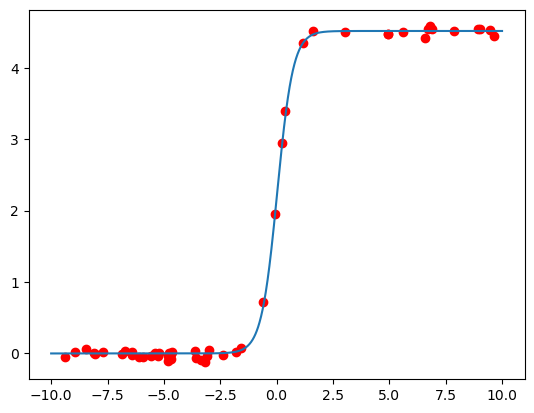

In [14]:
X = np.linspace(-10, 10, 2001)
Y = Model(X, theta)
plt.plot(X, Y)
plt.scatter(xdata, ydata, color= 'r')
plt.show()